In [1]:
# 1. IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# 2. DATA LOADING
# Using a public raw URL for the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

print(f"Dataset loaded with {df.shape[0]} instances and {df.shape[1]} columns.")
df.head()

Dataset loaded with 768 instances and 9 columns.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


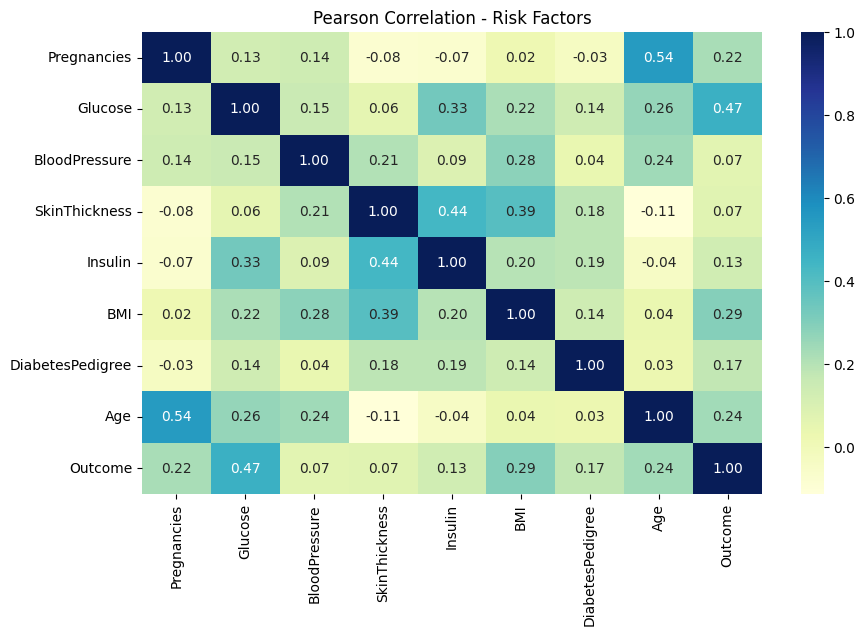

In [3]:
# 3. QUICK EXPLORATORY ANALYSIS (QEA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Pearson Correlation - Risk Factors")
plt.show()

# INSIGHTS FROM PEARSON CORRELATION:
# 1. Strongest Predictor (Glucose): 'Glucose' has the highest correlation with 'Outcome' (0.47). 
#    This indicates that higher glucose levels are the most significant risk factor for diabetes in this dataset.
# 2. Body Mass Index (BMI): 'BMI' also shows a notable positive correlation (0.29), 
#    suggesting that higher body mass is linked to an increased probability of a positive diagnosis.
# 3. Age and Pregnancies: There is a strong correlation between 'Age' and 'Pregnancies' (0.54). 
#    While expected, the model will use these features to understand how risk scales over time.
# 4. Multicollinearity: 'Insulin' and 'SkinThickness' show moderate correlation (0.44), 
#    which makes sense biologically but is not high enough to cause redundancy issues in Logistic Regression.
# 5. Low Impact Features: 'BloodPressure' and 'DiabetesPedigree' show very low direct correlation with the outcome, 
#    but they still contribute small weights to the final Sigmoid probability calculation.

In [4]:
# 4. DATA PREPARATION
# X = Features (Input), y = Target (Output)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# We split the data. random_state=42 ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape[0]} samples | Test set: {X_test.shape[0]} samples")

Train set: 614 samples | Test set: 154 samples


In [5]:
# 5. MODEL TRAINING
# Instantiate the model
model = LogisticRegression(max_iter=200)

# Fit (Train) the model
model.fit(X_train, y_train)

print(f"Model trained!")
print(f"Intercept (b): {model.intercept_}")

# Creating a DataFrame to visualize the weights (coefficients) of each feature
coef_df = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Weight (w)'])
print("\nFeature Coefficients:")
print(coef_df)

Model trained!
Intercept (b): [-9.00630384]

Feature Coefficients:
                  Weight (w)
Pregnancies         0.064365
Glucose             0.034094
BloodPressure      -0.013877
SkinThickness       0.003294
Insulin            -0.001804
BMI                 0.102596
DiabetesPedigree    0.626779
Age                 0.037091


Overall Accuracy: 0.7468


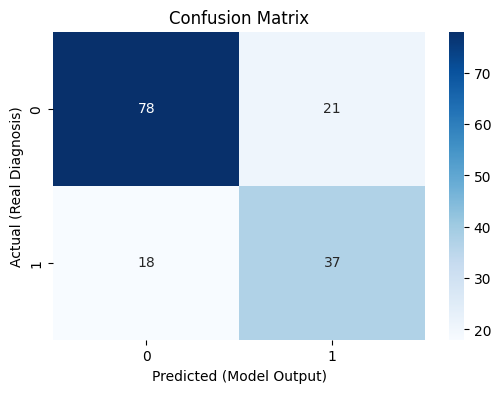


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# 6. PREDICTION AND EVALUATION

# The model makes predictions using the test set (X_test), which consists of data it has never seen before.
y_pred = model.predict(X_test)

# Calculate the Overall Accuracy (the proportion of total correct predictions) and display it with 4 decimal places.
# Based on your screenshot, the value obtained was 0.7468 (approx. 75% accuracy).
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Set the figure size for the Confusion Matrix plot.
plt.figure(figsize=(6,4))

# Generate the Heatmap for the Confusion Matrix.
# 'annot=True' displays the numbers inside the squares; 'fmt='d'' ensures they are formatted as integers.
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

# Define the axis labels and the plot title.
plt.xlabel('Predicted (Model Output)') # X-axis: What the model predicted
plt.ylabel('Actual (Real Diagnosis)')  # Y-axis: The patient's actual diagnosis
plt.title('Confusion Matrix')
plt.show()

# Generate and print the detailed Classification Report including Precision, Recall, and F1-Score.
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# EVALUATION INSIGHTS (EXTRACTED DIRECTLY FROM YOUR RESULTS):
#
# 1. OVERALL ACCURACY (75%): The model has solid global performance, but accuracy 
#    alone can hide failures in specific disease detection.
#
# 2. CONFUSION MATRIX ANALYSIS:
#    - True Negatives (78): The model is very good at identifying healthy patients.
#    - True Positives (37): The model successfully detected 37 real cases of diabetes.
#    - False Positives (21): The model generated 21 "false alarms" (healthy people classified as sick).
#    - False Negatives (18): The model failed to detect 18 diabetics. In healthcare, 
#      this is the most critical area, as these are sick people the model considered healthy.
#
# 3. PRECISION (0.64 for Class 1):
#    - When the model predicts diabetes, it is correct approximately 64% of the time.
#
# 4. RECALL / SENSITIVITY (0.67 for Class 1):
#    - Of all the actual diabetics in the test set (55 total), the model found 67%.
#    - This suggests the algorithm is still somewhat "conservative" in diagnosing the disease.
#
# 5. F1-SCORE (0.65 for Class 1):
#    - The balance between precision and recall for diabetes (0.65) is lower than for 
#      non-diabetes (0.80), showing the model is better at predicting healthy cases.

In [7]:
# 7. SIMULATION: NEW PATIENT
# Let's create a patient with high Glucose (150) and Age 45
new_patient = pd.DataFrame({
    'Pregnancies': [2], 'Glucose': [150], 'BloodPressure': [70], 
    'SkinThickness': [20], 'Insulin': [80], 'BMI': [33.5], 
    'DiabetesPedigree': [0.5], 'Age': [45]
})

# predict_proba gives us the chance in % for each class
probability = model.predict_proba(new_patient)[:, 1]
result = model.predict(new_patient)

print(f"Probability of having Diabetes: {probability[0]*100:.2f}%")
print(f"Final Model Diagnosis: {'Positive' if result[0] == 1 else 'Negative'}")

Probability of having Diabetes: 64.71%
Final Model Diagnosis: Positive
